Dataset Loaded Successfully!

                                               Quote           Author  \
0  The world as we have created it is a process o...  Albert Einstein   
1  It is our choices, Harry, that show what we tr...     J.K. Rowling   
2  There are only two ways to live your life. One...  Albert Einstein   
3  The person, be it gentleman or lady, who has n...      Jane Austen   
4  Imperfection is beauty, madness is genius and ...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  


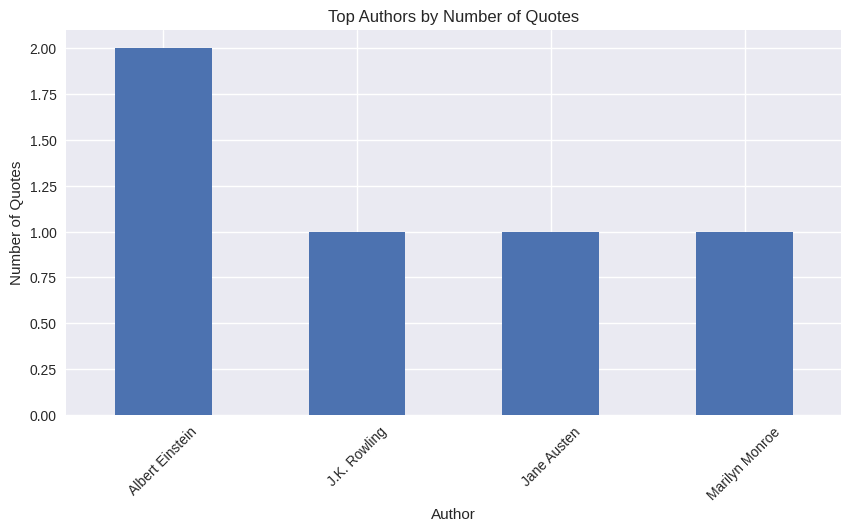

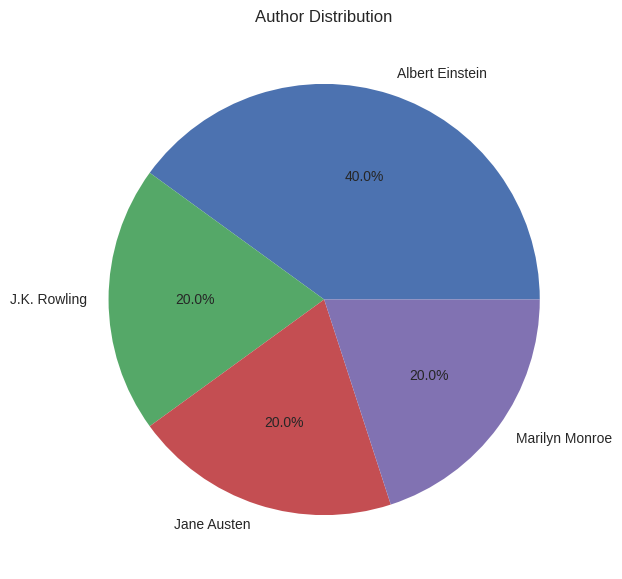

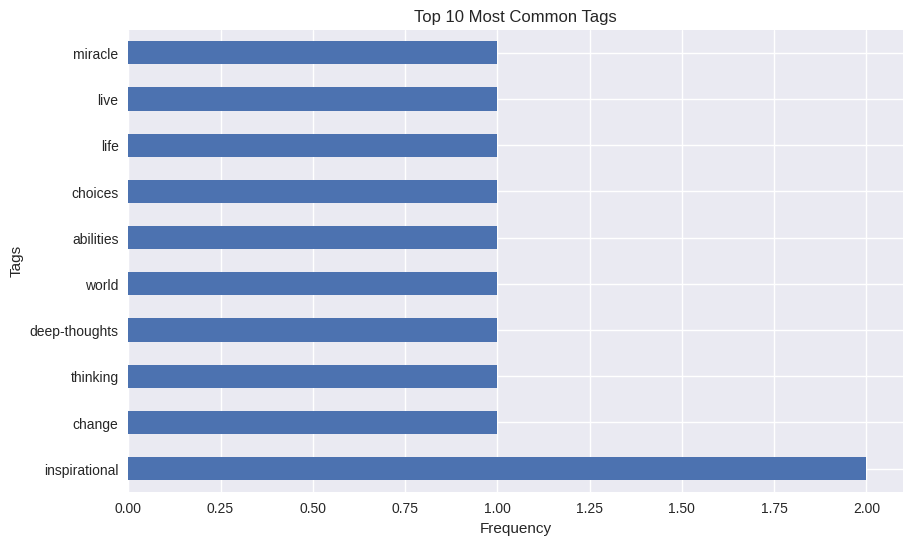

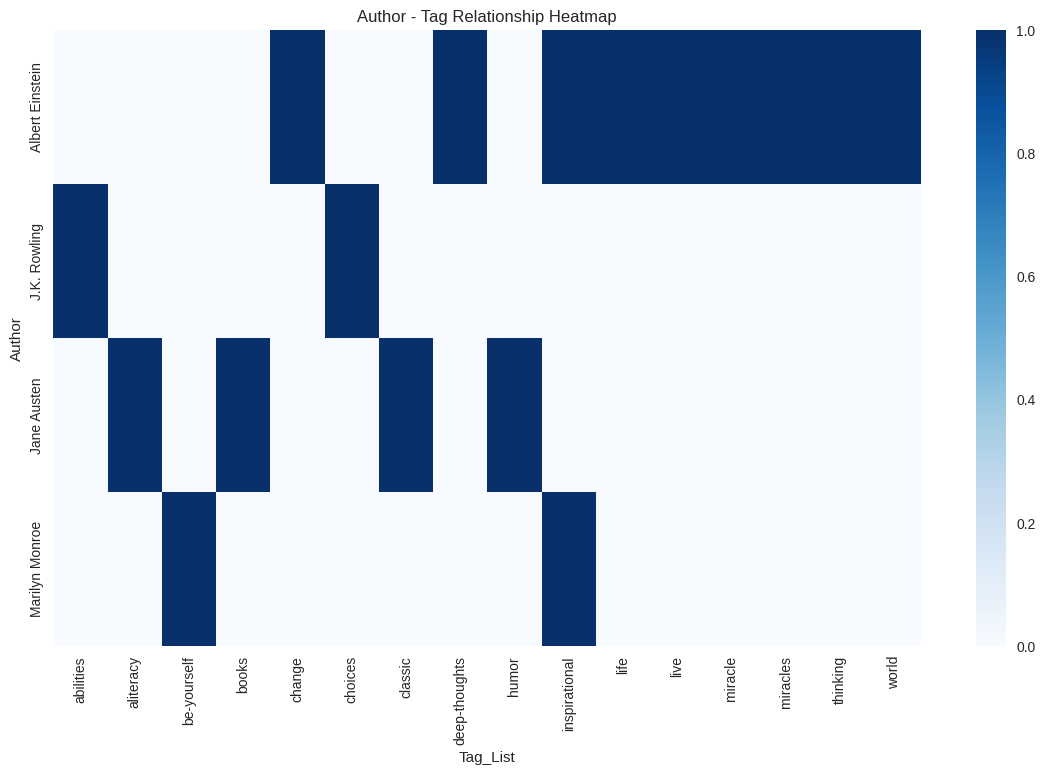

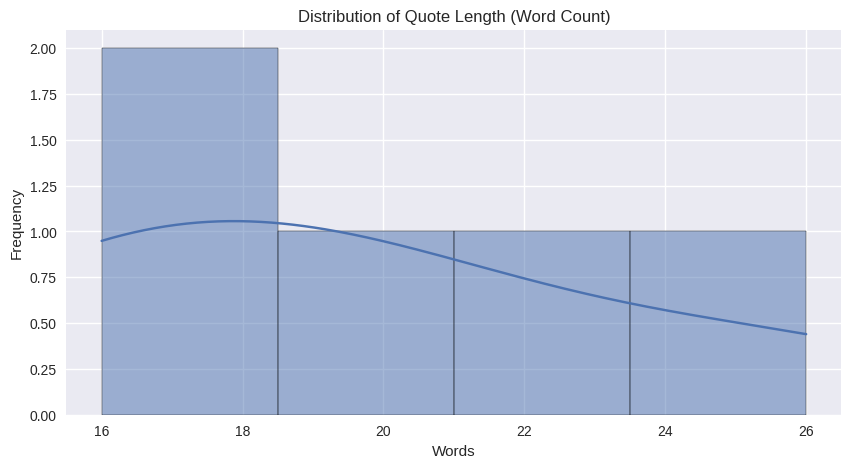


TASK 3 COMPLETED SUCCESSFULLY ✔


In [3]:
# =========================================================
# TASK 3 — DATA VISUALIZATION
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# =====================================================================
# 1. EMBEDDED DATASET (quotes_custom_dataset.csv created inside Colab)
# =====================================================================

csv_data = """
Quote,Author,Tags
"The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.","Albert Einstein","change, deep-thoughts, thinking, world"
"It is our choices, Harry, that show what we truly are, far more than our abilities.","J.K. Rowling","abilities, choices"
"There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.","Albert Einstein","inspirational, life, live, miracle, miracles"
"The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.","Jane Austen","aliteracy, books, classic, humor"
"Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.","Marilyn Monroe","be-yourself, inspirational"
"""

# Create DataFrame
df = pd.read_csv(io.StringIO(csv_data))

print("Dataset Loaded Successfully!\n")
print(df.head())

# =========================================================
# 2. CLEANING
# =========================================================
df['Author'] = df['Author'].str.strip()
df['Tags'] = df['Tags'].fillna("unknown")
df["Tag_List"] = df["Tags"].apply(lambda x: x.split(", "))
df_exploded = df.explode("Tag_List")

plt.style.use("seaborn-v0_8")

# =========================================================
# BAR CHART
# =========================================================
plt.figure(figsize=(10, 5))
df['Author'].value_counts().plot(kind='bar')
plt.title("Top Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.xticks(rotation=45)
plt.show()

# =========================================================
# PIE CHART
# =========================================================
plt.figure(figsize=(7, 7))
df['Author'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Author Distribution")
plt.ylabel("")
plt.show()

# =========================================================
# TOP TAGS
# =========================================================
plt.figure(figsize=(10, 6))
df_exploded["Tag_List"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.show()

# =========================================================
# HEATMAP
# =========================================================
cross_tab = pd.crosstab(df_exploded['Author'], df_exploded['Tag_List'])
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, cmap="Blues")
plt.title("Author - Tag Relationship Heatmap")
plt.show()

# =========================================================
# WORD COUNT DISTRIBUTION
# =========================================================
df["Word_Count"] = df["Quote"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df["Word_Count"], kde=True)
plt.title("Distribution of Quote Length (Word Count)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

print("\nTASK 3 COMPLETED SUCCESSFULLY ✔")
